In [ ]:
import pandas as pd
import torch
import numpy as np
import nltk

from transformers import BertTokenizer, BertModel
from nltk.corpus import stopwords
from transformers import BertTokenizer, BertModel


In [ ]:
#upload 2 files with correct answers and the answers provideed by our proposed model
modelAnswers_df = pd.read_csv('proposedAnswers.csv') #enter the path for proposedAnswers
adf = pd.read_excel('answers.xlsx') #enter the path for correct answers

In [ ]:
# Download the list of stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """
    Remove stop words from a string.

    Args:
    text (str): The input string.

    Returns:
    str: The string with stop words removed.
    """
    return ' '.join([word for word in text.split() if word.lower() not in stop_words])

def calculate_bert_semantic_accuracy(model_answers, correct_answers):
    """
    Calculate the accuracy of a model based on semantic similarity between the model's answers and the correct answers,
    using BERT for tokenization and embedding generation.

    Args:
    model_answers (list of str): The answers provided by the model.
    correct_answers (list of str): The correct answers for the questions.

    Returns:
    float: The semantic accuracy of the model.
    """
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')

    # Tokenize and encode the sequences
    def encode(answers):
        answers = [remove_stopwords(answer) for answer in answers]
        tokens = tokenizer(answers, padding=True, truncation=True, return_tensors="pt")
        with torch.no_grad():
            embeddings = model(**tokens).last_hidden_state.mean(dim=1)
        return embeddings

    # Compute embeddings
    model_answer_embeddings = encode(model_answers)
    correct_answer_embeddings = encode(correct_answers)

    # Calculate cosine similarities
    similarities = torch.nn.functional.cosine_similarity(model_answer_embeddings, correct_answer_embeddings)


    return similarities
model_answers = []  # Replace with the answers from your model
correct_answers = []  # Replace with the correct answers from your dataset

n = min(modelAnswers_df.shape[0],adf.shape[0])
for i in range(34):
  model_answers.append(modelAnswers_df['Answer'][i])
  correct_answers.append(str(adf['Answers'][i]))



bert_semantic_accuracy = calculate_bert_semantic_accuracy(model_answers, correct_answers)
print(f"Model BERT Semantic Accuracy: {bert_semantic_accuracy }")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Model BERT Semantic Accuracy: tensor([0.6448, 0.5585, 0.5735, 0.3545, 0.5767, 0.5855, 0.7078, 0.5544, 0.5992,
        0.5289, 0.3936, 0.7095, 0.4458, 0.4930, 0.6078, 0.8620, 0.5610, 0.6550,
        0.6519, 0.5589, 0.5491, 0.7160, 0.6857, 0.7094, 0.5837, 0.8332, 0.6493,
        0.4158, 0.6296, 0.6129, 0.6359, 0.5259, 0.4542, 0.7491])


In [ ]:
print(len(bert_semantic_accuracy))

34


In [ ]:
from statistics import mean
def calculate_avg(model):

  return mean(model.tolist())

print(f"Average semantic accuracy is: {calculate_avg(bert_semantic_accuracy)}")

Average semantic accuracy is: 0.5991811699727002


In [ ]:
def approximate_precision(similarity_scores, threshold):
    """
    Approximate the precision of answers based on similarity scores and a defined threshold.

    Args:
    similarity_scores (list): A list of similarity scores.
    threshold (float): The threshold for considering an answer as a positive prediction.

    Returns:
    float: The approximate precision as a percentage.
    """
    aTP = sum(score >= threshold for score in similarity_scores)
    aFP = sum(score < threshold for score in similarity_scores)  # This is a rough approximation

    if aTP + aFP == 0:
        return 0

    approx_precision = (aTP / (aTP + aFP)) * 100
    return approx_precision

similarity_scores = bert_semantic_accuracy.tolist()  # similarity scores
threshold = 0.7  # Threshold for considering an answer as a positive prediction

precision = approximate_precision(similarity_scores, threshold)
print(f"Precision of our method is {precision}")


Precision of our method is 20.588235294117645


In [ ]:
def approximate_recall(similarity_scores, threshold, estimated_total_positives):
    """
    Approximate the recall of answers based on similarity scores, a defined threshold, and an estimated total number of positives.

    Args:
    similarity_scores (list): A list of similarity scores.
    threshold (float): The threshold for considering an answer as a retrieved positive.
    estimated_total_positives (int): An estimate of the total number of correct answers in the dataset.

    Returns:
    float: The approximate recall as a percentage.
    """
    aTP = sum(score >= threshold for score in similarity_scores)

    if estimated_total_positives == 0:
        return 0

    approx_recall = (aTP / estimated_total_positives) * 100
    return approx_recall

# Example usage
similarity_scores = bert_semantic_accuracy.tolist()  # Example similarity scores
threshold = 0.7  # Threshold for considering an answer as a retrieved positive
estimated_total_positives = 30  # An estimated total number of correct answers

recall = approximate_recall(similarity_scores, threshold, estimated_total_positives)
print(f"Recall of our method is {recall}")

Recall of our method is 23.333333333333332


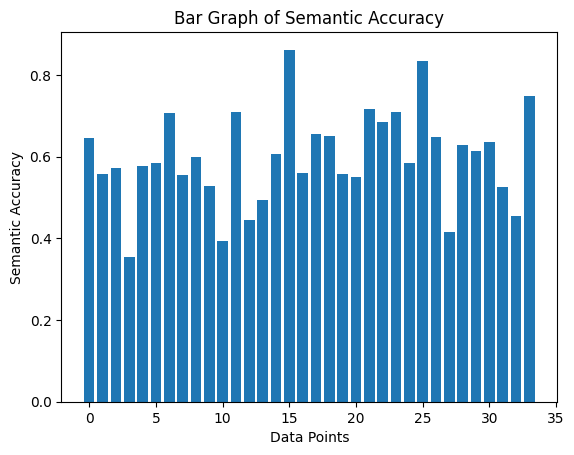

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data_series = bert_semantic_accuracy

# Create a bar graph
plt.bar(range(len(data_series)), data_series)

# Set labels and title
plt.xlabel('Data Points')
plt.ylabel('Semantic Accuracy')
plt.title('Bar Graph of Semantic Accuracy')

# Display the bar graph
plt.show()

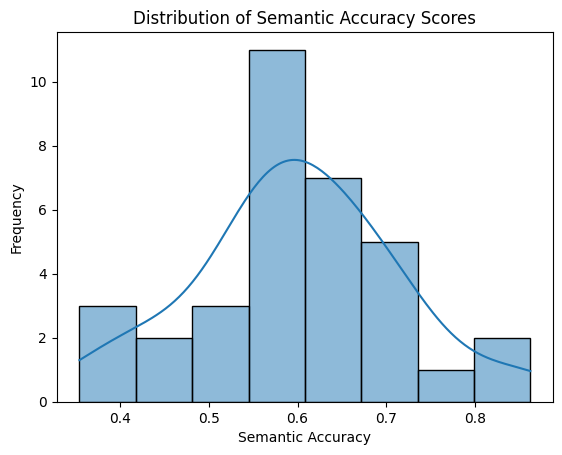

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(bert_semantic_accuracy, kde=True)
plt.title('Distribution of Semantic Accuracy Scores')
plt.xlabel('Semantic Accuracy')
plt.ylabel('Frequency')
plt.show()

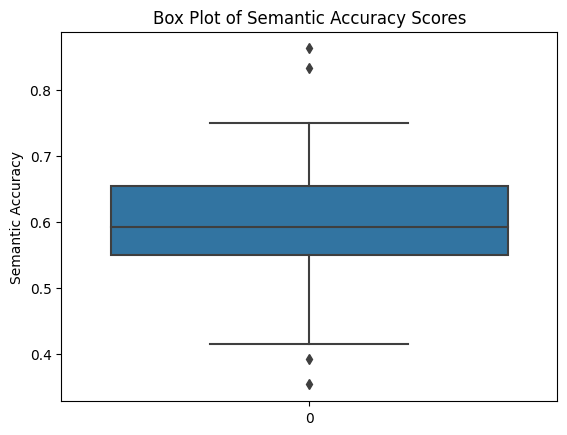

In [ ]:
sns.boxplot(bert_semantic_accuracy.tolist())
plt.title('Box Plot of Semantic Accuracy Scores')
plt.ylabel('Semantic Accuracy')
plt.show()

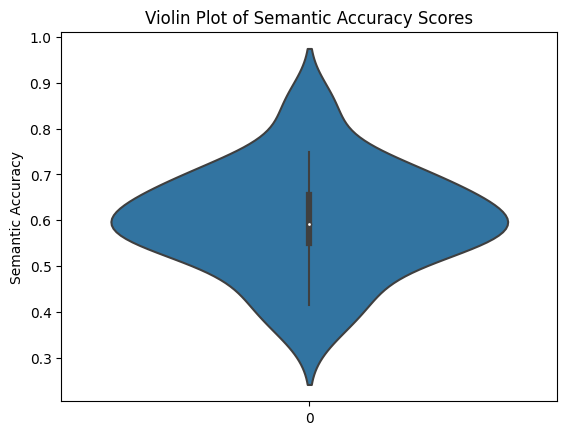

In [ ]:
sns.violinplot(bert_semantic_accuracy.tolist())
plt.title('Violin Plot of Semantic Accuracy Scores')
plt.ylabel('Semantic Accuracy')
plt.show()


###Human Evaluations

We did human evaluations on 36 questions using 5 human evaluators. The answers provided by llm was judged against the correct answers and was ranked on a scale of 1 to 5 with 5 being perfectly matching and 1 meaning irrelevant answer.\
Following are the results found:
- 64% of the responses generated by the model were accurate
- 17% of the responses generated by the model were moderately accurate
- 19% of the responses generated by the model were not entirely accurate